# Testing QA4MBES functionality 2: grid coverage testing


In [1]:
from shapely.geometry import shape
import json

In [2]:
## awkward hack to import local modules in Jupyter
import sys
sys.executable
sys.path.append('/mnt/bigdata/frontierSI/qa4mbes-data-pipeline/qa4mbes')

In [3]:
import testcoverage
import getpointcoverage

## 1. Check geotiff grid coverage of a planned area

Does my geotiff raster cover any of the planned survey region? if so how much? if not roughly how far away were we?

### The positive case - we surveyed some of the planned region

In [ ]:
%%time

coveragestats = testcoverage.testcoverage('/mnt/bigdata/frontierSI/sampledata/raster/grid1_1m-crs.tiff',
                                          '../tests/geotiff-test-grid1.shp')

In [ ]:
coveragestats

### we surveyed all of the planned region and then more...

In [ ]:
%%time

totalcoveragestats = testcoverage.testcoverage('/mnt/bigdata/frontierSI/sampledata/raster/grid1_1m-crs.tiff',
                                          '../tests/geotiff-test-allcovered.shp')

In [ ]:
totalcoveragestats

Area covered is reported as 1.0, because the intersection of the planning polygon and the survey polygon is the survey polygon...

### The null case - we didn't survey any of the planned region

In [ ]:
nullstats = testcoverage.testcoverage('../tests/4819-100000lines.xyz',
                                      '../tests/nulltest.shp')

In [ ]:
nullstats

## 2. Check BAG coverage of a planned area

Does my bathymetry attributed grid cover any of the planned survey region? if so how much? if not roughly how far away were we?

In [4]:
%%time

bagcoverage = testcoverage.testcoverage('../../bag-samples/grid1_ellipsoid_1m.bag',
                                          '../tests/geotiff-test-grid1.shp')

CPU times: user 33.4 s, sys: 300 ms, total: 33.7 s
Wall time: 33.7 s


In [5]:
bagcoverage

{'teststart': '2019-02-28T15:16:06.684901',
 'teststop': '2019-02-28T15:16:40.424465',
 'plannedcoverage': '../tests/geotiff-test-grid1.shp',
 'testswath': '../../bag-samples/grid1_ellipsoid_1m.bag',
 'percentcovered': 0.503423952663992,
 'areacovered': 17587152.538201123,
 'centroiddistance': 604.2233201741079,
 'minimumdistance': 0.0,
 'intersection': '{"type": "MultiPolygon", "coordinates": [[[[147.22814505605953, -39.2583645001916], [147.22817983327676, -39.258364432058464], [147.2281798917072, -39.25838245657996], [147.2281451144811, -39.25838252471314], [147.22814505605953, -39.2583645001916]]], [[[147.2277878205362, -39.259023098642494], [147.2278110055652, -39.25902305329204], [147.2278110347339, -39.25903206555201], [147.22782262724988, -39.25903204287505], [147.22782268559024, -39.259050067394924], [147.2278110930713, -39.2590500900719], [147.22781106390258, -39.25904107781196], [147.22778787886764, -39.25904112316244], [147.2277878205362, -39.259023098642494]]], [[[147.22637

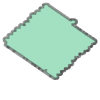

In [9]:
shape(json.loads(coveragestats["intersection"]))

In [10]:
%%time

bagnullcoverage = testcoverage.testcoverage('../../bag-samples/grid1_ellipsoid_1m.bag',
                                          '../tests/testjson.geojson')

CPU times: user 33 s, sys: 160 ms, total: 33.2 s
Wall time: 33.2 s


In [11]:
coveragestats

{'teststart': '2019-02-28T15:21:42.036077',
 'teststop': '2019-02-28T15:22:15.213447',
 'plannedcoverage': '../tests/testjson.geojson',
 'testswath': '../../bag-samples/grid1_ellipsoid_1m.bag',
 'percentcovered': None,
 'areacovered': None,
 'centroiddistance': 306454.38046609436,
 'minimumdistance': 303269.45634502696,
 'intersection': None}

### Interpreting results

`testcoverage` returns a python dictionary containing:

- time of test start
- time of test stop
- path to the 'planned' coverage
- path to the survey swathe being tested
- % of planned coverage overlapped by the swath
- area (in metres) of the planned coverage overlapped by the swath
- distance (in metres) between the centroids of the planned coverage and the swath coverage
- minimum distance (in metres) between the planned and survey coverages. This is a rough guide mainly used to see how far away the survey was in the case of no overlap with the planned region
- a GeoJSON polygon describing the intersection of planned coverage and survey coverage

Optionally, it could contain GeoJSON polygons describing the actual coverages used in the test.

**question:** should swath density metrics be included here?